In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [9]:
# Part 1: Read in COVID-19 death data
path = r'C:\Users\ellen\Desktop\Data Analysis with Python\Project 2 - data\data\\'
df = pd.read_csv(path + 'Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022.csv')

C:\Users\ellen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471960 entries, 0 to 471959
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          471960 non-null  object 
 1   Start Date          471960 non-null  object 
 2   End Date            471960 non-null  object 
 3   Group               471960 non-null  object 
 4   Year                459540 non-null  object 
 5   Month               422280 non-null  float64
 6   State               471960 non-null  object 
 7   Condition Group     471960 non-null  object 
 8   Condition           471960 non-null  object 
 9   ICD10_codes         471960 non-null  object 
 10  Age Group           471960 non-null  object 
 11  COVID-19 Deaths     338022 non-null  object 
 12  Number of Mentions  342287 non-null  object 
 13  Flag                133938 non-null  object 
dtypes: float64(1), object(13)
memory usage: 50.4+ MB


In [11]:
df.head(10)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,426","1,491",NaN
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,641","5,853",NaN
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,719","15,324",NaN
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"36,629","38,057",NaN
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"80,316","83,218",NaN
5,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,"123,441","127,232",NaN
6,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,"129,752","132,741",NaN
7,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,"110,444","112,000",NaN
8,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,Not stated,10,10,NaN
9,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,"502,378","515,926",NaN


In [12]:
'''
    pandas.to_numeric
        errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
            If ‘raise’, then invalid parsing will raise an exception.
            If ‘coerce’, then invalid parsing will be set as NaN.
            If ‘ignore’, then invalid parsing will return the input.
'''
df['COVID deaths'] = pd.to_numeric(df['COVID-19 Deaths'], errors = 'coerce')
df.groupby('State')['COVID deaths'].sum()

State
Alabama                  230907.0
Alaska                    22546.0
Arizona                  291305.0
Arkansas                 165784.0
California               603491.0
Colorado                 214691.0
Connecticut              140866.0
Delaware                  54040.0
District of Columbia      43470.0
Florida                  502967.0
Georgia                  329890.0
Hawaii                    28776.0
Idaho                     94157.0
Illinois                 331257.0
Indiana                  287469.0
Iowa                     146941.0
Kansas                   136662.0
Kentucky                 252085.0
Louisiana                209396.0
Maine                     37296.0
Maryland                 227450.0
Massachusetts            211448.0
Michigan                 305611.0
Minnesota                211575.0
Mississippi              205829.0
Missouri                 236193.0
Montana                   73639.0
Nebraska                  97167.0
Nevada                   175388.0
New Hamp

In [14]:
# The number for "United States" looks disputable. It does not look like the sum of all states. Probably it means deaths from US territories such as Puerto Rico, Guam, Virgin Island, etc.
# To avoid confusion, we exclude "United States" in subsequent analysis
df = df[df['State'].str.strip() != 'United States']
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths
230,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,18,18,NaN,18.0
231,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,100,105,NaN,100.0
232,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,228,235,NaN,228.0
233,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,537,554,NaN,537.0
234,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"1,159","1,194",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471955,10/02/2022,06/01/2022,06/30/2022,By Month,"2,022",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,222.0,222.0,NaN,222.0
471956,10/02/2022,07/01/2022,07/31/2022,By Month,"2,022",7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,200.0,200.0,NaN,200.0
471957,10/02/2022,08/01/2022,08/31/2022,By Month,"2,022",8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,222.0,222.0,NaN,222.0
471958,10/02/2022,09/01/2022,09/30/2022,By Month,"2,022",9.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,139.0,139.0,NaN,139.0


In [15]:
# Part 2: Death analysis by cause and age group
df.groupby('Group')['COVID deaths'].sum()

Group
By Month    5996437.0
By Total    1528784.0
By Year     3160534.0
Name: COVID deaths, dtype: float64

In [16]:
df.groupby(['Group', 'Year', 'Month'])['COVID deaths'].sum()

Group     Year   Month
By Month  2,020  1.0           0.0
                 2.0           0.0
                 3.0       39306.0
                 4.0      268938.0
                 5.0      219120.0
                 6.0      115813.0
                 7.0      166114.0
                 8.0      170884.0
                 9.0      125184.0
                 10.0     166455.0
                 11.0     326318.0
                 12.0     493516.0
          2,021  1.0      478640.0
                 2.0      283740.0
                 3.0      151034.0
                 4.0      122939.0
                 5.0      101176.0
                 6.0       51045.0
                 7.0       69291.0
                 8.0      253110.0
                 9.0      341914.0
                 10.0     267420.0
                 11.0     210885.0
                 12.0     279766.0
          2,022  1.0      474347.0
                 2.0      330182.0
                 3.0      111675.0
                 4.0       38939

In [17]:
df.groupby(['Group', 'Start Date', 'End Date'])['COVID deaths'].sum()

Group     Start Date  End Date  
By Month  01/01/2020  01/31/2020          0.0
          01/01/2021  01/31/2021     478640.0
          01/01/2022  01/31/2022     474347.0
          02/01/2020  02/29/2020          0.0
          02/01/2021  02/28/2021     283740.0
          02/01/2022  02/28/2022     330182.0
          03/01/2020  03/31/2020      39306.0
          03/01/2021  03/31/2021     151034.0
          03/01/2022  03/31/2022     111675.0
          04/01/2020  04/30/2020     268938.0
          04/01/2021  04/30/2021     122939.0
          04/01/2022  04/30/2022      38939.0
          05/01/2020  05/31/2020     219120.0
          05/01/2021  05/31/2021     101176.0
          05/01/2022  05/31/2022      48651.0
          06/01/2020  06/30/2020     115813.0
          06/01/2021  06/30/2021      51045.0
          06/01/2022  06/30/2022      62577.0
          07/01/2020  07/31/2020     166114.0
          07/01/2021  07/31/2021      69291.0
          07/01/2022  07/31/2022      88433.0
 

In [18]:
# Looks like we need to exclude the groups "By Total" and "By Year"
df = df[~df['Group'].str.strip().isin(['By Total', 'By Year'])]

In [25]:
df.groupby('Condition Group')['COVID deaths'].sum()

Condition Group
All other conditions and causes (residual)                                    693228.0
Alzheimer disease                                                              51208.0
COVID-19                                                                     1171194.0
Circulatory diseases                                                         1254632.0
Diabetes                                                                      264144.0
Intentional and unintentional injury, poisoning, and other adverse events      36355.0
Malignant neoplasms                                                           101886.0
Obesity                                                                        82303.0
Renal failure                                                                 205778.0
Respiratory diseases                                                         1793711.0
Sepsis                                                                        189017.0
Vascular and unspecified de

In [26]:
# Plot Condition Group vs # of Deaths
death_toll = df.groupby('Condition Group')['COVID deaths'].sum().reset_index()
death_toll.sort_values(by = 'COVID deaths', inplace = True, ascending = False)

death_toll

,Condition Group,COVID deaths
9,Respiratory diseases,1793711.0
3,Circulatory diseases,1254632.0
2,COVID-19,1171194.0
0,All other conditions and causes (residual),693228.0
4,Diabetes,264144.0
8,Renal failure,205778.0
10,Sepsis,189017.0
11,Vascular and unspecified dementia,152981.0
6,Malignant neoplasms,101886.0
7,Obesity,82303.0


<Figure size 1296x360 with 0 Axes>

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


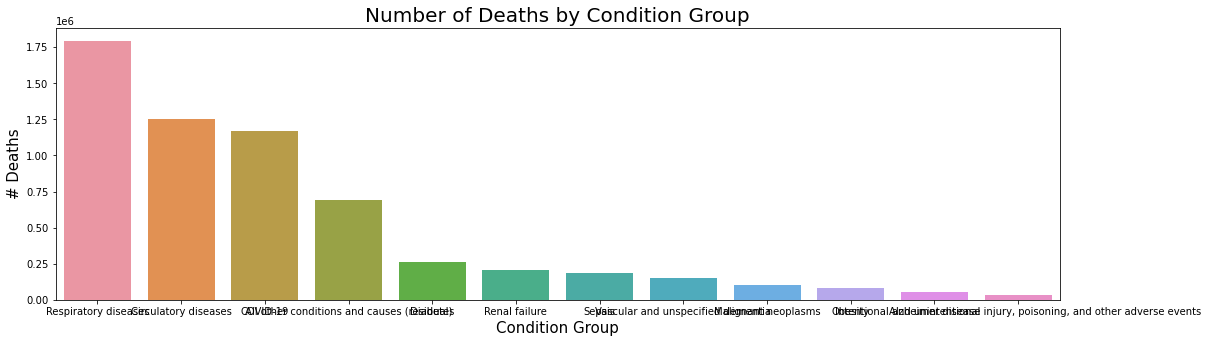

In [30]:
fig = plt.figure(figsize = (18, 5))
sns.barplot(death_toll['Condition Group'], death_toll['COVID deaths'])
plt.title('Number of Deaths by Condition Group', fontsize = 20)
plt.xlabel('Condition Group', fontsize = 15)
plt.ylabel('# Deaths', fontsize = 15)
plt.show()

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


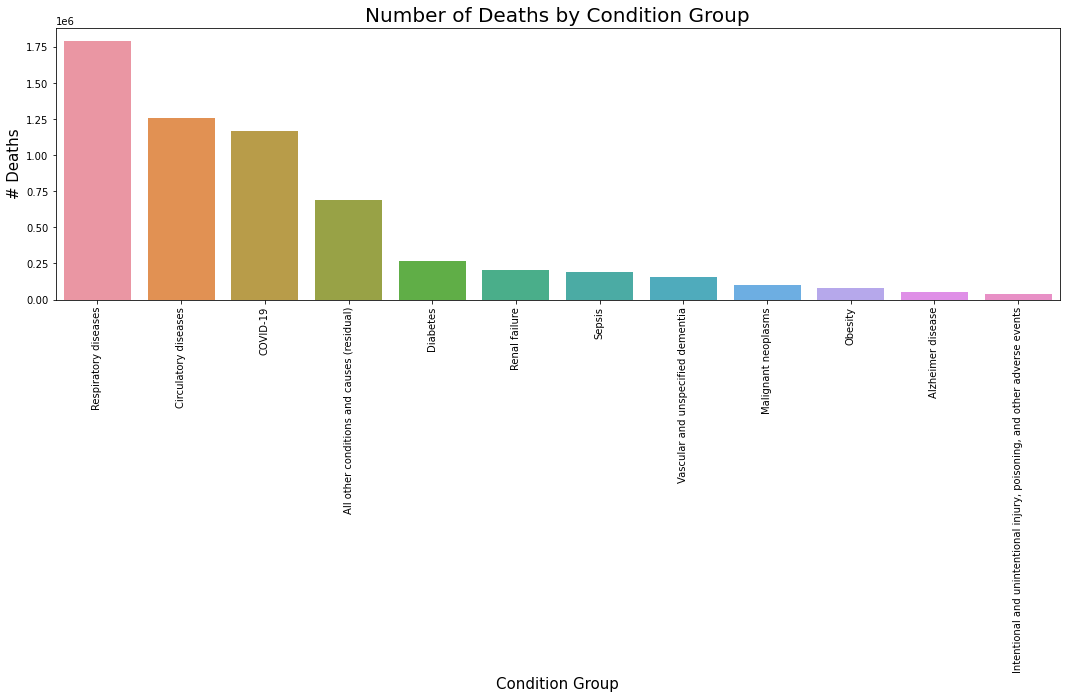

In [31]:
fig = plt.figure(figsize = (18, 5))

sns.barplot(death_toll['Condition Group'], death_toll['COVID deaths'])
plt.title('Number of Deaths by Condition Group', fontsize = 20)
plt.xlabel('Condition Group', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('# Deaths', fontsize = 15)
plt.show()

In [32]:
# Break group name into separate lines for graphing
df['Condition Group Name'] = df['Condition Group'].str.replace(' ', '\n')

<ipython-input-32-fdb1097340b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Condition Group Name'] = df['Condition Group'].str.replace(' ', '\n')


                                 Condition Group Name  COVID deaths
9                               Respiratory\ndiseases       1793711
3                               Circulatory\ndiseases       1254632
2                                            COVID-19       1171194
0     All\nother\nconditions\nand\ncauses\n(residual)        693228
4                                            Diabetes        264144
8                                      Renal\nfailure        205778
10                                             Sepsis        189017
11               Vascular\nand\nunspecified\ndementia        152981
6                                Malignant\nneoplasms        101886
7                                             Obesity         82303
1                                  Alzheimer\ndisease         51208
5   Intentional\nand\nunintentional\ninjury,\npois...         36355


C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


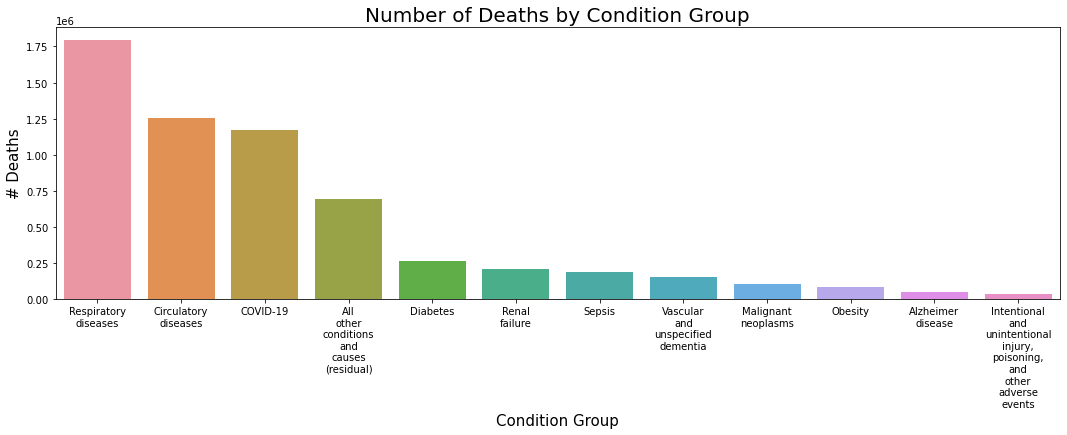

In [33]:
fig=plt.figure(figsize=(18, 5))

death_toll=df.groupby('Condition Group Name')['COVID deaths'].sum().reset_index()
death_toll.sort_values(by='COVID deaths', inplace=True, ascending=False)
death_toll['COVID deaths']=death_toll['COVID deaths'].astype(int)
print(death_toll)

sns.barplot(death_toll['Condition Group Name'], death_toll['COVID deaths'])
plt.title('Number of Deaths by Condition Group', fontsize=20)
plt.xlabel('Condition Group', fontsize=15)
plt.ylabel('# Deaths', fontsize=15)
plt.show()

In [34]:
df.groupby('Condition')['COVID deaths'].sum()

Condition
Adult respiratory distress syndrome                                           179508.0
All other conditions and causes (residual)                                    693228.0
Alzheimer disease                                                              51208.0
COVID-19                                                                     1171194.0
Cardiac arrest                                                                199424.0
Cardiac arrhythmia                                                            146804.0
Cerebrovascular diseases                                                       89424.0
Chronic lower respiratory diseases                                            173611.0
Diabetes                                                                      264144.0
Heart failure                                                                 150247.0
Hypertensive diseases                                                         326046.0
Influenza and pneumonia          

<ipython-input-37-f73c28f5e7b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition name']=df['Condition'].str.replace(' ', '\n')
C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                                       condition name  COVID deaths
3                                            COVID-19       1171194
11                          Influenza\nand\npneumonia        706788
1     All\nother\nconditions\nand\ncauses\n(residual)        693228
20                               Respiratory\nfailure        614896
10                             Hypertensive\ndiseases        326046
8                                            Diabetes        264144
18                                     Renal\nfailure        205778
13                           Ischemic\nheart\ndisease        204181
4                                     Cardiac\narrest        199424
21                                             Sepsis        189017
0              Adult\nrespiratory\ndistress\nsyndrome        179508
7               Chronic\nlower\nrespiratory\ndiseases        173611
22               Vascular\nand\nunspecified\ndementia        152981
9                                      Heart\nfa

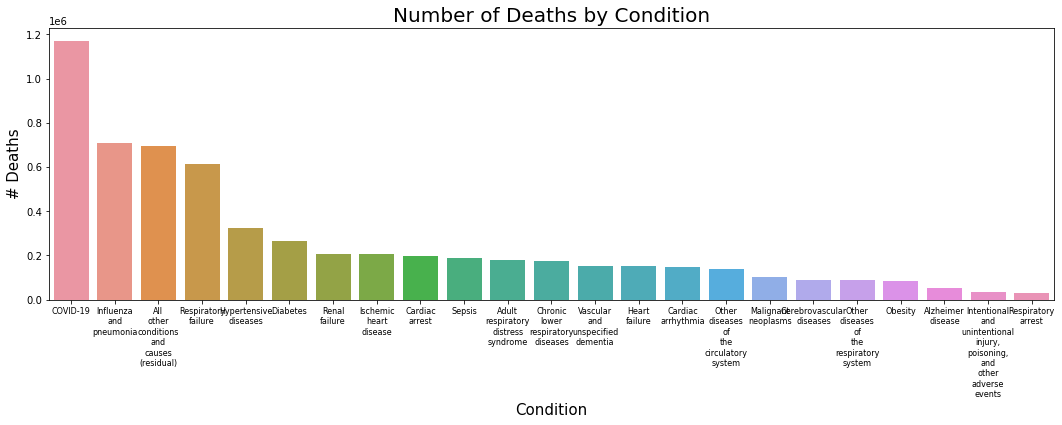

In [37]:
fig=plt.figure(figsize=(18, 5))

df['condition name']=df['Condition'].str.replace(' ', '\n')

death_toll=df.groupby('condition name')['COVID deaths'].sum().reset_index()
death_toll.sort_values(by='COVID deaths', inplace=True, ascending=False)
death_toll['COVID deaths']=death_toll['COVID deaths'].astype(int)
print(death_toll)

sns.barplot(death_toll['condition name'], death_toll['COVID deaths'])
plt.title('Number of Deaths by Condition', fontsize=20)
plt.xlabel('Condition', fontsize=15)
plt.xticks(fontsize=8)
plt.ylabel('# Deaths', fontsize=15)
plt.show()

In [38]:
# Condition is a subset of Condition Group
df_temp = df.groupby(['Condition Group', 'Condition'])['COVID deaths'].sum().reset_index()
df_temp.head(100)

,Condition Group,Condition,COVID deaths
0,All other conditions and causes (residual),All other conditions and causes (residual),693228.0
1,Alzheimer disease,Alzheimer disease,51208.0
2,COVID-19,COVID-19,1171194.0
3,Circulatory diseases,Cardiac arrest,199424.0
4,Circulatory diseases,Cardiac arrhythmia,146804.0
5,Circulatory diseases,Cerebrovascular diseases,89424.0
6,Circulatory diseases,Heart failure,150247.0
7,Circulatory diseases,Hypertensive diseases,326046.0
8,Circulatory diseases,Ischemic heart disease,204181.0
9,Circulatory diseases,Other diseases of the circulatory system,138506.0


In [39]:
# check ICD10 codes to see whether they will be useful
df.groupby('ICD10_codes')['COVID deaths'].sum()

ICD10_codes
A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99     693228.0
A40-A41                                                                                                                                                                                  189017.0
C00-C97                                                                                                                                                                                  101886.0
E10-E14                                                                                                                                                                                  264144.0
E65-E68                                                                                                                                                                                   82303.0
F01, F03          

In [40]:
df_check = df[df['ICD10_codes'].str.strip() == 'J09-J18']
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18020 entries, 57500 to 464479
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data As Of            18020 non-null  object 
 1   Start Date            18020 non-null  object 
 2   End Date              18020 non-null  object 
 3   Group                 18020 non-null  object 
 4   Year                  18020 non-null  object 
 5   Month                 18020 non-null  float64
 6   State                 18020 non-null  object 
 7   Condition Group       18020 non-null  object 
 8   Condition             18020 non-null  object 
 9   ICD10_codes           18020 non-null  object 
 10  Age Group             18020 non-null  object 
 11  COVID-19 Deaths       13160 non-null  object 
 12  Number of Mentions    13238 non-null  object 
 13  Flag                  4860 non-null   object 
 14  COVID deaths          13015 non-null  float64
 15  Condition Grou

In [41]:
df.groupby('Age Group')['COVID deaths'].sum()

Age Group
0-24             2779.0
25-34           20087.0
35-44           71048.0
45-54          207256.0
55-64          501038.0
65-74          807755.0
75-84          906521.0
85+            857350.0
All Ages      2622603.0
Not stated          0.0
Name: COVID deaths, dtype: float64

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


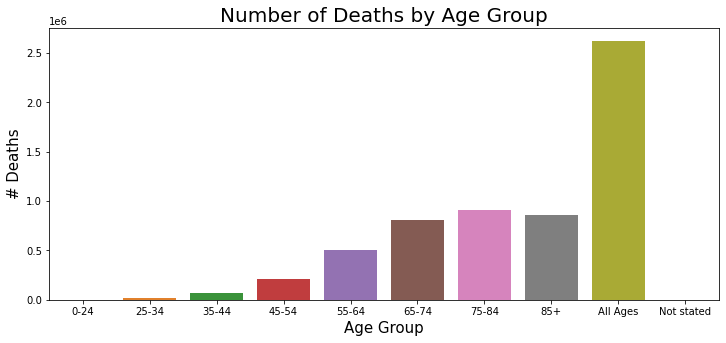

In [42]:
fig = plt.figure(figsize = (12, 5))

df_temp = df.groupby('Age Group')['COVID deaths'].sum().reset_index()

sns.barplot(df_temp['Age Group'], df_temp['COVID deaths'])
plt.title('Number of Deaths by Age Group', fontsize = 20)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('# Deaths', fontsize = 15)
plt.show()

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


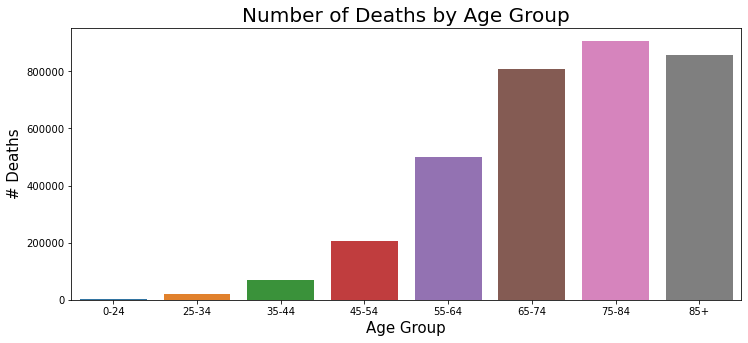

In [43]:
# exclude the last two groups
fig = plt.figure(figsize = (12, 5))

df_temp = df.groupby('Age Group')['COVID deaths'].sum().reset_index()
df_temp = df_temp[~df_temp['Age Group'].isin(['All Ages', 'Not stated'])]

sns.barplot(df_temp['Age Group'], df_temp['COVID deaths'])
plt.title('Number of Deaths by Age Group', fontsize = 20)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('# Deaths', fontsize = 15)
plt.show()

In [44]:
# copy the population data by age group from wikipedia 
# https://en.wikipedia.org/wiki/Demographics_of_the_United_States

pop_0_24=sum([3564, 18827, 60467, 43089])
pop_85_plus=sum([5976, 98])

pop_by_age_group=[pop_0_24, 45495, 43404, 40688, 42803, 55848, 22182, pop_85_plus]

pop_by_age_group=pd.DataFrame(pop_by_age_group)
pop_by_age_group

,0
0,125947
1,45495
2,43404
3,40688
4,42803
5,55848
6,22182
7,6074


In [45]:
# append population data to the dataframe
pop_by_age_group = pd.DataFrame(pop_by_age_group)
df_temp['population'] = pop_by_age_group * 1000

In [46]:
df_temp.head(30)

,Age Group,COVID deaths,population
0,0-24,2779.0,125947000
1,25-34,20087.0,45495000
2,35-44,71048.0,43404000
3,45-54,207256.0,40688000
4,55-64,501038.0,42803000
5,65-74,807755.0,55848000
6,75-84,906521.0,22182000
7,85+,857350.0,6074000


C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


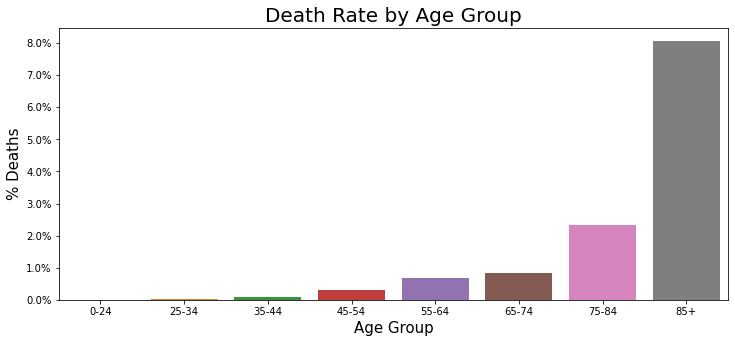

In [49]:
# use death rate to plot graph
import matplotlib.ticker as mtick

df_temp['death_rate'] = (df_temp['COVID deaths'] / 1.75) / df_temp['population']

fig = plt.figure(figsize = (12, 5))

sns.barplot(df_temp['Age Group'], df_temp['death_rate'])
plt.title('Death Rate by Age Group', fontsize = 20)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('% Deaths', fontsize = 15)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1.0))
plt.show()

In [50]:
df.groupby('Start Date')['COVID deaths'].sum()

Start Date
01/01/2020         0.0
01/01/2021    478640.0
01/01/2022    474347.0
02/01/2020         0.0
02/01/2021    283740.0
02/01/2022    330182.0
03/01/2020     39306.0
03/01/2021    151034.0
03/01/2022    111675.0
04/01/2020    268938.0
04/01/2021    122939.0
04/01/2022     38939.0
05/01/2020    219120.0
05/01/2021    101176.0
05/01/2022     48651.0
06/01/2020    115813.0
06/01/2021     51045.0
06/01/2022     62577.0
07/01/2020    166114.0
07/01/2021     69291.0
07/01/2022     88433.0
08/01/2020    170884.0
08/01/2021    253110.0
08/01/2022     91735.0
09/01/2020    125184.0
09/01/2021    341914.0
09/01/2022     47290.0
10/01/2020    166455.0
10/01/2021    267420.0
10/01/2022         0.0
11/01/2020    326318.0
11/01/2021    210885.0
12/01/2020    493516.0
12/01/2021    279766.0
Name: COVID deaths, dtype: float64

In [51]:
df.groupby('End Date')['COVID deaths'].sum()

End Date
01/31/2020         0.0
01/31/2021    478640.0
01/31/2022    474347.0
02/28/2021    283740.0
02/28/2022    330182.0
02/29/2020         0.0
03/31/2020     39306.0
03/31/2021    151034.0
03/31/2022    111675.0
04/30/2020    268938.0
04/30/2021    122939.0
04/30/2022     38939.0
05/31/2020    219120.0
05/31/2021    101176.0
05/31/2022     48651.0
06/30/2020    115813.0
06/30/2021     51045.0
06/30/2022     62577.0
07/31/2020    166114.0
07/31/2021     69291.0
07/31/2022     88433.0
08/31/2020    170884.0
08/31/2021    253110.0
08/31/2022     91735.0
09/30/2020    125184.0
09/30/2021    341914.0
09/30/2022     47290.0
10/01/2022         0.0
10/31/2020    166455.0
10/31/2021    267420.0
11/30/2020    326318.0
11/30/2021    210885.0
12/31/2020    493516.0
12/31/2021    279766.0
Name: COVID deaths, dtype: float64

In [52]:
df['Start Dt'] = pd.to_datetime(df['Start Date'], errors = 'coerce')

<ipython-input-52-09a3ac2483c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Dt'] = pd.to_datetime(df['Start Date'], errors = 'coerce')


In [53]:
df.head(20)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name,Start Dt
57500,10/02/2022,01/01/2020,01/31/2020,By Month,"2,020",1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01
57501,10/02/2022,02/01/2020,02/29/2020,By Month,"2,020",2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-02-01
57502,10/02/2022,03/01/2020,03/31/2020,By Month,"2,020",3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-03-01
57503,10/02/2022,04/01/2020,04/30/2020,By Month,"2,020",4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-04-01
57504,10/02/2022,05/01/2020,05/31/2020,By Month,"2,020",5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-05-01
57505,10/02/2022,06/01/2020,06/30/2020,By Month,"2,020",6.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-06-01
57506,10/02/2022,07/01/2020,07/31/2020,By Month,"2,020",7.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-07-01
57507,10/02/2022,08/01/2020,08/31/2020,By Month,"2,020",8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-08-01
57508,10/02/2022,09/01/2020,09/30/2020,By Month,"2,020",9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-09-01
57509,10/02/2022,10/01/2020,10/31/2020,By Month,"2,020",10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-10-01


In [54]:
df['year'] = df['Start Dt'].dt.year
df['month'] = df['Start Dt'].dt.month

df.head(20)

<ipython-input-54-175ea4a9e3e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Start Dt'].dt.year
<ipython-input-54-175ea4a9e3e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Start Dt'].dt.month


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name,Start Dt,year,month
57500,10/02/2022,01/01/2020,01/31/2020,By Month,"2,020",1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1
57501,10/02/2022,02/01/2020,02/29/2020,By Month,"2,020",2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-02-01,2020,2
57502,10/02/2022,03/01/2020,03/31/2020,By Month,"2,020",3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-03-01,2020,3
57503,10/02/2022,04/01/2020,04/30/2020,By Month,"2,020",4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-04-01,2020,4
57504,10/02/2022,05/01/2020,05/31/2020,By Month,"2,020",5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-05-01,2020,5
57505,10/02/2022,06/01/2020,06/30/2020,By Month,"2,020",6.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-06-01,2020,6
57506,10/02/2022,07/01/2020,07/31/2020,By Month,"2,020",7.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-07-01,2020,7
57507,10/02/2022,08/01/2020,08/31/2020,By Month,"2,020",8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-08-01,2020,8
57508,10/02/2022,09/01/2020,09/30/2020,By Month,"2,020",9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-09-01,2020,9
57509,10/02/2022,10/01/2020,10/31/2020,By Month,"2,020",10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-10-01,2020,10


In [55]:
def assign_season(x):
    if x in (3, 4, 5):
        return 'a.Spring'
    elif x in (6, 7, 8, 9):
        return 'b.Summer'
    elif x in (10, 11):
        return 'c.Fall'
    else:
        return 'd.Winter'
    
df['season'] = df['month'].apply(assign_season)

<ipython-input-55-7da2bacf102f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['month'].apply(assign_season)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414460 entries, 57500 to 471959
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Data As Of            414460 non-null  object        
 1   Start Date            414460 non-null  object        
 2   End Date              414460 non-null  object        
 3   Group                 414460 non-null  object        
 4   Year                  414460 non-null  object        
 5   Month                 414460 non-null  float64       
 6   State                 414460 non-null  object        
 7   Condition Group       414460 non-null  object        
 8   Condition             414460 non-null  object        
 9   ICD10_codes           414460 non-null  object        
 10  Age Group             414460 non-null  object        
 11  COVID-19 Deaths       289977 non-null  object        
 12  Number of Mentions    293751 non-null  object        


In [57]:
df.columns.tolist()

['Data As Of',
 'Start Date',
 'End Date',
 'Group',
 'Year',
 'Month',
 'State',
 'Condition Group',
 'Condition',
 'ICD10_codes',
 'Age Group',
 'COVID-19 Deaths',
 'Number of Mentions',
 'Flag',
 'COVID deaths',
 'Condition Group Name',
 'condition name',
 'Start Dt',
 'year',
 'month',
 'season']

In [58]:
df.groupby('season')['COVID deaths'].count()

season
a.Spring    72755
b.Summer    96570
c.Fall      44816
d.Winter    74982
Name: COVID deaths, dtype: int64

In [59]:
df['year_month'] = df['year'] * 100 + df['month']
df = df[(df['year_month'] >= 202001) & (df['year_month'] <= 202209)]

df['year_month'] = df['year_month'].astype(str)
df.head(10)

<ipython-input-59-15ef6f883b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['year'] * 100 + df['month']
<ipython-input-59-15ef6f883b42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['year_month'].astype(str)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,...,Number of Mentions,Flag,COVID deaths,Condition Group Name,condition name,Start Dt,year,month,season,year_month
57500,10/02/2022,01/01/2020,01/31/2020,By Month,"2,020",1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-01-01,2020,1,d.Winter,202001
57501,10/02/2022,02/01/2020,02/29/2020,By Month,"2,020",2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-02-01,2020,2,d.Winter,202002
57502,10/02/2022,03/01/2020,03/31/2020,By Month,"2,020",3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-03-01,2020,3,a.Spring,202003
57503,10/02/2022,04/01/2020,04/30/2020,By Month,"2,020",4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-04-01,2020,4,a.Spring,202004
57504,10/02/2022,05/01/2020,05/31/2020,By Month,"2,020",5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-05-01,2020,5,a.Spring,202005
57505,10/02/2022,06/01/2020,06/30/2020,By Month,"2,020",6.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-06-01,2020,6,b.Summer,202006
57506,10/02/2022,07/01/2020,07/31/2020,By Month,"2,020",7.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-07-01,2020,7,b.Summer,202007
57507,10/02/2022,08/01/2020,08/31/2020,By Month,"2,020",8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-08-01,2020,8,b.Summer,202008
57508,10/02/2022,09/01/2020,09/30/2020,By Month,"2,020",9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,NaN,One or more data cells have counts between 1-9...,NaN,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-09-01,2020,9,b.Summer,202009
57509,10/02/2022,10/01/2020,10/31/2020,By Month,"2,020",10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,...,0,NaN,0.0,Respiratory\ndiseases,Influenza\nand\npneumonia,2020-10-01,2020,10,c.Fall,202010


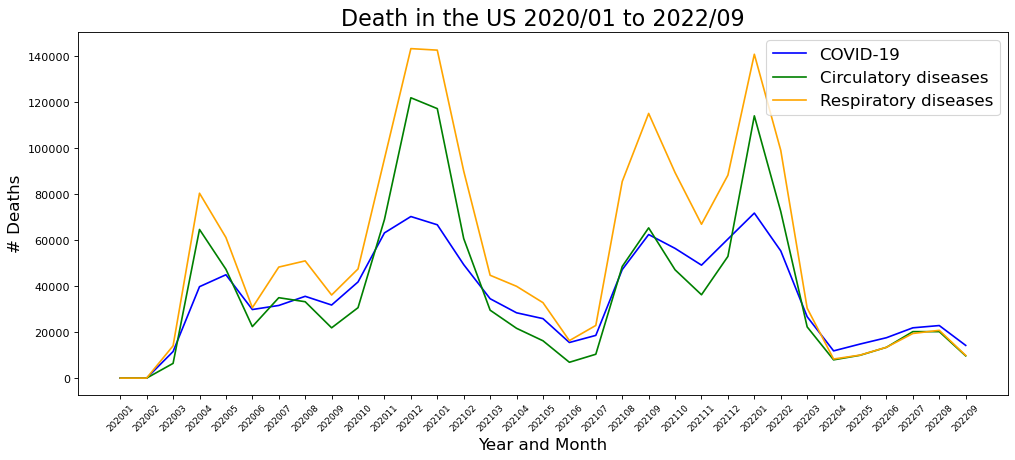

In [60]:
figure(figsize = (15, 6), dpi = 80)

df2 = df.groupby(['year_month', 'Condition Group'])['COVID deaths'].sum().reset_index()

df_covid = df2[df2['Condition Group'] == 'COVID-19']
df_circulatory = df2[df2['Condition Group'] == 'Circulatory diseases']
df_respiratory = df2[df2['Condition Group'] == 'Respiratory diseases']

plt.plot(df_covid['year_month'], df_covid['COVID deaths'], color = 'b', label = 'COVID-19')
plt.plot(df_circulatory['year_month'], df_circulatory['COVID deaths'], color = 'g', label = 'Circulatory diseases')
plt.plot(df_respiratory['year_month'], df_respiratory['COVID deaths'], color = 'orange', label = 'Respiratory diseases')
plt.title('Death in the US 2020/01 to 2022/09', fontsize = 20)
plt.xlabel('Year and Month', fontsize = 15)
plt.ylabel('# Deaths', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 8)
plt.legend(loc = 'upper right', fontsize = 15)
plt.show()

In [62]:
df2 = df.groupby(['year_month', 'Condition Group'])['COVID deaths'].sum()
df2

year_month  Condition Group                           
202001      All other conditions and causes (residual)       0.0
            Alzheimer disease                                0.0
            COVID-19                                         0.0
            Circulatory diseases                             0.0
            Diabetes                                         0.0
                                                           ...  
202209      Obesity                                         14.0
            Renal failure                                 1127.0
            Respiratory diseases                          9856.0
            Sepsis                                         994.0
            Vascular and unspecified dementia             1350.0
Name: COVID deaths, Length: 396, dtype: float64

In [63]:
df3 = df2.unstack(level = 'Condition Group')
df3.columns.name = 'Causes of Deaths'
df3.head(10)

Causes of Deaths,All other conditions and causes (residual),Alzheimer disease,COVID-19,Circulatory diseases,Diabetes,"Intentional and unintentional injury, poisoning, and other adverse events",Malignant neoplasms,Obesity,Renal failure,Respiratory diseases,Sepsis,Vascular and unspecified dementia
year_month,,,,,,,,,,,,
202001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202003,3304.0,33.0,11538.0,6390.0,1611.0,11.0,294.0,202.0,648.0,14038.0,923.0,314.0
202004,26286.0,3202.0,39744.0,64623.0,15224.0,898.0,4282.0,2850.0,9166.0,80381.0,8980.0,13302.0
202005,24240.0,2986.0,44927.0,47297.0,10757.0,691.0,2680.0,1475.0,5800.0,61134.0,6254.0,10879.0
202006,13184.0,1301.0,29806.0,22383.0,5652.0,279.0,1163.0,953.0,2804.0,30615.0,3031.0,4642.0
202007,16905.0,1972.0,31575.0,34954.0,9002.0,755.0,2067.0,3295.0,5308.0,48266.0,5867.0,6148.0
202008,17728.0,2156.0,35551.0,33197.0,8170.0,503.0,1931.0,2328.0,5662.0,50960.0,6619.0,6079.0
202009,15048.0,1381.0,31769.0,21852.0,5516.0,330.0,1232.0,1026.0,3450.0,36117.0,3988.0,3475.0


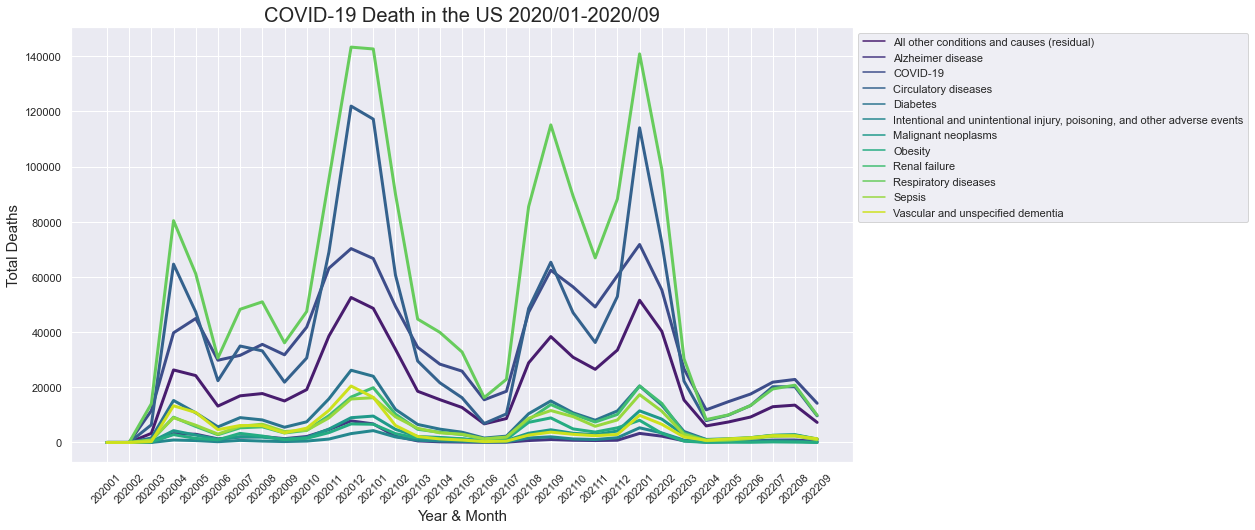

In [65]:
df4 = df.groupby(['year_month', 'Condition Group'])['COVID deaths'].sum().reset_index()

sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize': (14, 8)})

ax = sns.lineplot(data = df4, x = 'year_month', y = 'COVID deaths', hue = 'Condition Group', palette = 'viridis', legend = 'full', lw = 3)

plt.legend(bbox_to_anchor = (1, 1))
plt.xticks(rotation = 45)
plt.ylabel('Total Deaths', fontsize = 15)
plt.xlabel('Year & Month', fontsize = 15)
plt.title('COVID-19 Death in the US 2020/01-2020/09', fontsize = 20)
plt.show()

In [66]:
# Part 3: Compare state level data
df_state = df.groupby('State')['COVID deaths'].sum().reset_index()

In [72]:
# read in population data by state
population = pd.read_excel(path + 'state_data.xls', sheet_name = 'population')
population['State'] = np.where(population['State'].str.contains('D.C.'), 'District of Columbia', population['State'])
population.head()

,Rank,State,Population in 2021,Population in 2020
0,24.0,Alabama,5039877,5024279
1,48.0,Alaska,732673,733391
2,NaN,All United States,331893745,331449281
3,14.0,Arizona,7276316,7151502
4,33.0,Arkansas,3025891,3011524


In [73]:
population_density = pd.read_excel(path + 'state_data.xls', sheet_name = 'population_density')
population_density.head()

,Rank,State,Population Density
0,NaN,All United States,93.970
1,1.0,"Washington, D. C.",10975.429
2,2.0,New Jersey,1260.110
3,3.0,Rhode Island,1059.778
4,4.0,Massachusetts,895.470


In [74]:
def change_DC(df):
    df['State'] = np.where(df['State'].str.contains('Washington,'), 'District of Columbia', df['State'])
    return df['State']

change_DC(population_density)

0        All United States
1     District of Columbia
2               New Jersey
3             Rhode Island
4            Massachusetts
5              Connecticut
6                 Maryland
7                 Delaware
8                 New York
9                  Florida
10            Pennsylvania
11                    Ohio
12              California
13                Illinois
14                  Hawaii
15                Virginia
16          North Carolina
17                 Indiana
18                 Georgia
19                Michigan
20          South Carolina
21               Tennessee
22           New Hampshire
23              Washington
24                Kentucky
25                   Texas
26               Wisconsin
27               Louisiana
28                 Alabama
29                Missouri
30           West Virginia
31               Minnesota
32                 Vermont
33                 Arizona
34             Mississippi
35                Arkansas
36                Oklahoma
3

In [75]:
population_density = population_density[~population_density['Rank'].isnull()]
population_density.head(60)

,Rank,State,Population Density
1,1.0,District of Columbia,10975.4290
2,2.0,New Jersey,1260.1100
3,3.0,Rhode Island,1059.7780
4,4.0,Massachusetts,895.4700
5,5.0,Connecticut,744.5940
6,6.0,Maryland,635.1062
7,7.0,Delaware,514.9410
8,8.0,New York,420.9080
9,9.0,Florida,403.9170
10,10.0,Pennsylvania,289.7460


In [76]:
population2 = pd.merge(population, population_density, on = 'State', how = 'inner')
population2.head(55)

,Rank_x,State,Population in 2021,Population in 2020,Rank_y,Population Density
0,24.0,Alabama,5039877,5024279,28.0,99.5130
1,48.0,Alaska,732673,733391,51.0,1.2830
2,14.0,Arizona,7276316,7151502,33.0,64.0550
3,33.0,Arkansas,3025891,3011524,35.0,58.1500
4,1.0,California,39237836,39538223,12.0,251.8810
5,21.0,Colorado,5812069,5773714,38.0,56.0780
6,29.0,Connecticut,3605597,3605944,5.0,744.5940
7,45.0,Delaware,1003384,989948,7.0,514.9410
8,3.0,Florida,21781128,21538187,9.0,403.9170
9,8.0,Georgia,10799566,10711908,18.0,187.7740


In [77]:
state_abbreviation = pd.read_csv(path + 'state_name_abbreviation.csv')
state_abbreviation.head(50)

,State,State Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [82]:
# add DC in
DC_data = pd.DataFrame()
DC_data['State'] = 'District of Columbia'
DC_data['State Abbreviation'] = 'DC'
DC_data.head()

,State,State Abbreviation


In [83]:
# append Washington DC to the list
state_abbreviation = pd.concat([state_abbreviation, DC_data]).reset_index()
state_abbreviation.head(55)

,index,State,State Abbreviation
0,0,Alabama,AL
1,1,Alaska,AK
2,2,Arizona,AZ
3,3,Arkansas,AR
4,4,California,CA
5,5,Colorado,CO
6,6,Connecticut,CT
7,7,Delaware,DE
8,8,Florida,FL
9,9,Georgia,GA


In [84]:
# Merge with state abbreviation file
population_state = pd.merge(population2, state_abbreviation, on = 'State', how = 'inner')
population_state.head(55)

,Rank_x,State,Population in 2021,Population in 2020,Rank_y,Population Density,index,State Abbreviation
0,24.0,Alabama,5039877,5024279,28.0,99.5130,0,AL
1,48.0,Alaska,732673,733391,51.0,1.2830,1,AK
2,14.0,Arizona,7276316,7151502,33.0,64.0550,2,AZ
3,33.0,Arkansas,3025891,3011524,35.0,58.1500,3,AR
4,1.0,California,39237836,39538223,12.0,251.8810,4,CA
5,21.0,Colorado,5812069,5773714,38.0,56.0780,5,CO
6,29.0,Connecticut,3605597,3605944,5.0,744.5940,6,CT
7,45.0,Delaware,1003384,989948,7.0,514.9410,7,DE
8,3.0,Florida,21781128,21538187,9.0,403.9170,8,FL
9,8.0,Georgia,10799566,10711908,18.0,187.7740,9,GA


In [86]:
# sum death data to the state level
df_covid = df.groupby('State')['COVID deaths'].sum().reset_index()
df_covid = pd.merge(df_covid, population_state, on = 'State', how = 'inner')
df_covid.head(55)

,State,COVID deaths,Rank_x,Population in 2021,Population in 2020,Rank_y,Population Density,index,State Abbreviation
0,Alabama,118682.0,24.0,5039877,5024279,28.0,99.5130,0,AL
1,Alaska,5278.0,48.0,732673,733391,51.0,1.2830,1,AK
2,Arizona,167945.0,14.0,7276316,7151502,33.0,64.0550,2,AZ
3,Arkansas,77657.0,33.0,3025891,3011524,35.0,58.1500,3,AR
4,California,466691.0,1.0,39237836,39538223,12.0,251.8810,4,CA
5,Colorado,106268.0,21.0,5812069,5773714,38.0,56.0780,5,CO
6,Connecticut,62975.0,29.0,3605597,3605944,5.0,744.5940,6,CT
7,Delaware,16395.0,45.0,1003384,989948,7.0,514.9410,7,DE
8,District of Columbia,13376.0,49.0,670050,689545,1.0,10975.4290,50,DC
9,Florida,370401.0,3.0,21781128,21538187,9.0,403.9170,8,FL


In [87]:
party_affiliation = pd.read_csv(path + 'party_affiliation_by_state.csv')
party_affiliation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           51 non-null     int64  
 1   index                                                51 non-null     int64  
 2   State                                                51 non-null     object 
 3   2020 presidential election                           50 non-null     object 
 4   Governor                                             50 non-null     object 
 5   State Senate                                         50 non-null     object 
 6   State House                                          50 non-null     object 
 7   Senior US Senator                                    50 non-null     object 
 8   Junior US Senator                                    50 non-null     obj

In [ ]:
df_covid = pd.merge(df_covid, party_affiliation, on = 'State', how = 'inner')
df_covid.sort_values